In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Завантаження датасету
df = pd.read_csv("C:/Users/Alexander/Downloads/bikes_rent.csv")

# Виведення перших 5 рядків
print(df.head())


   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed(mph)  windspeed(ms)   cnt  
0  18.18125  80.5833       10.749882       4.805490   985  
1  17.68695  69.6087       16.652113       7.443949   801  
2   9.47025  43.7273       16.636703       7.437060  1349  
3  10.60610  59.0435       10.739832       4.800998  1562  
4  11.46350  43.6957       12.522300       5.597810  1600  


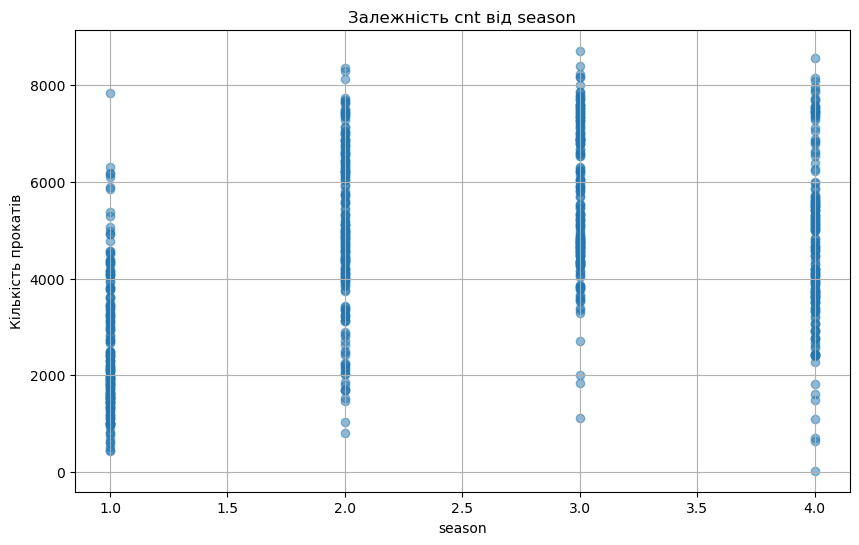

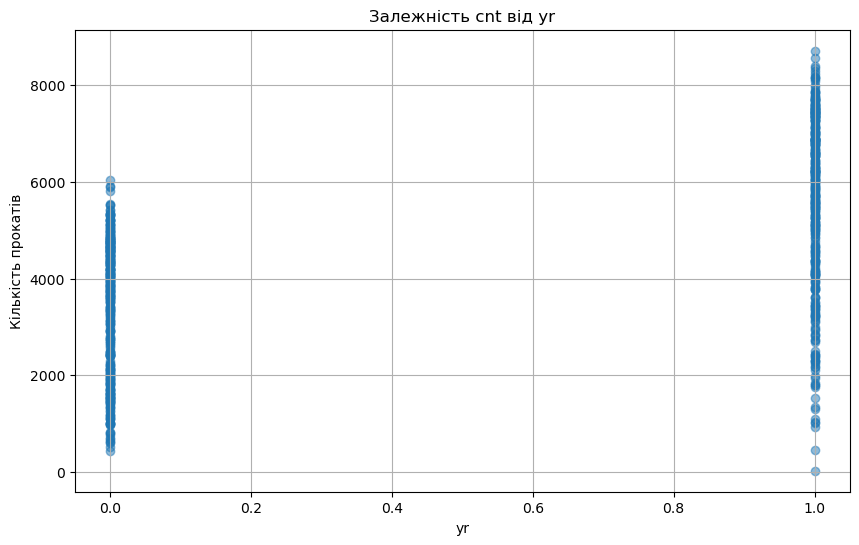

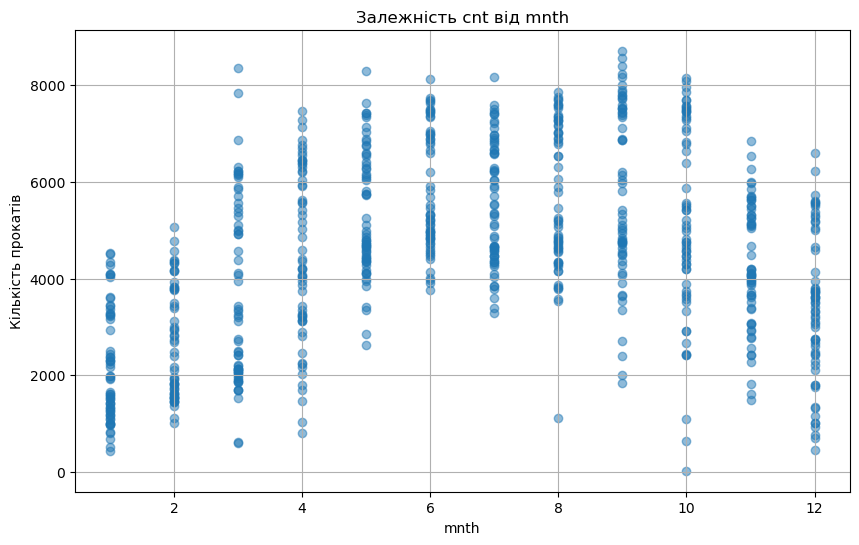

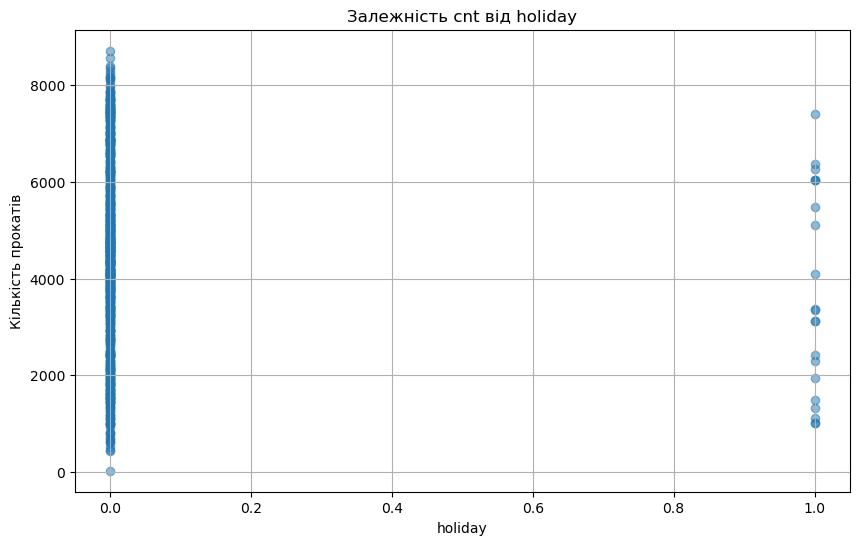

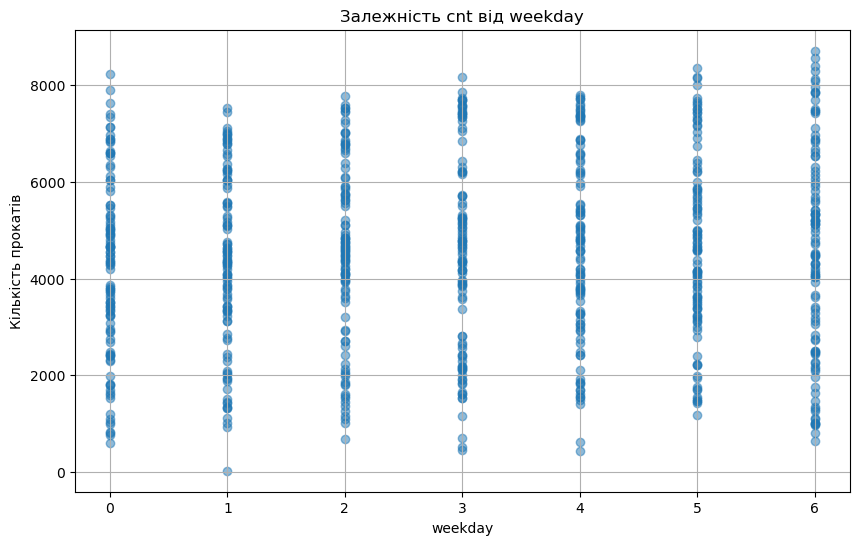

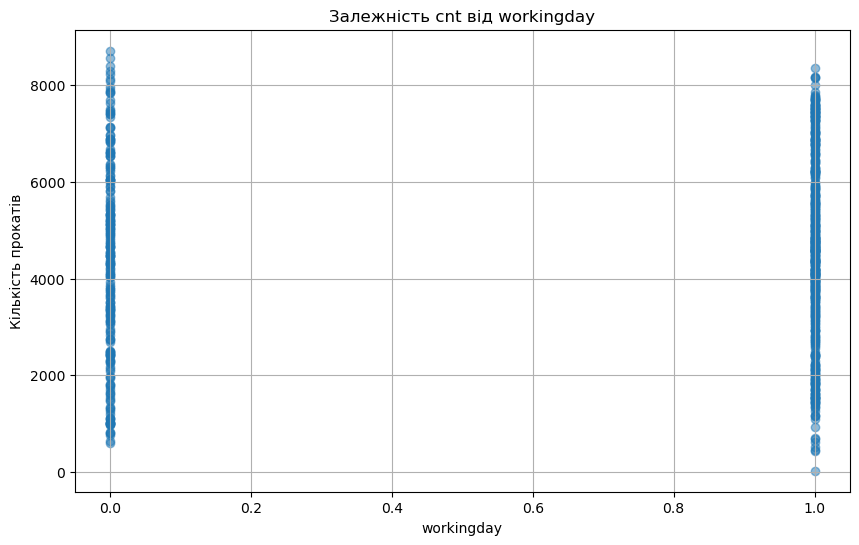

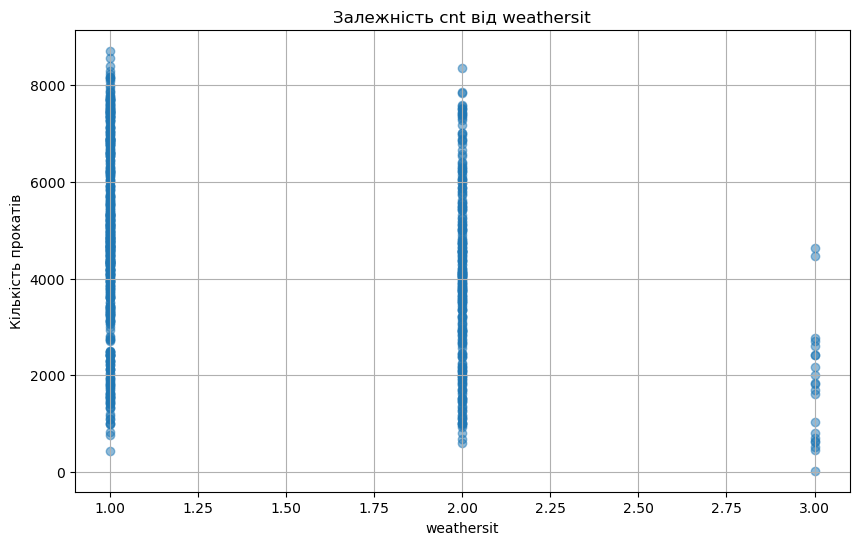

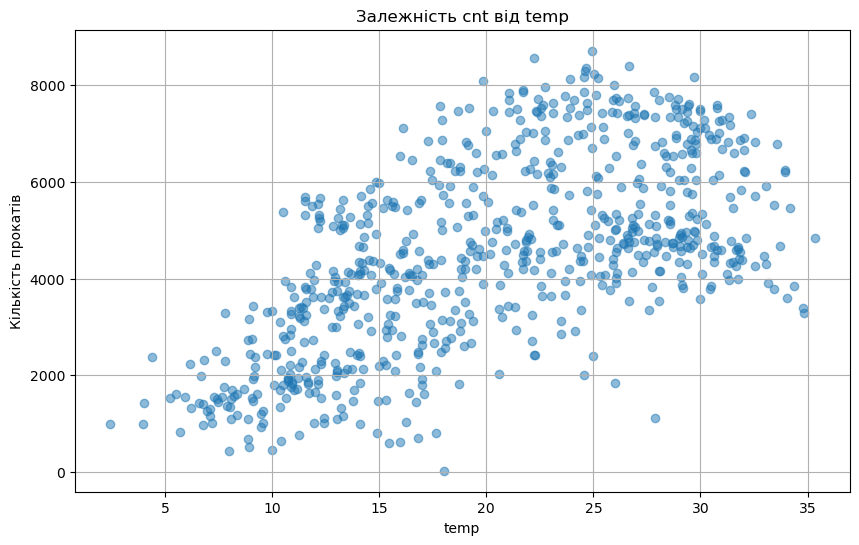

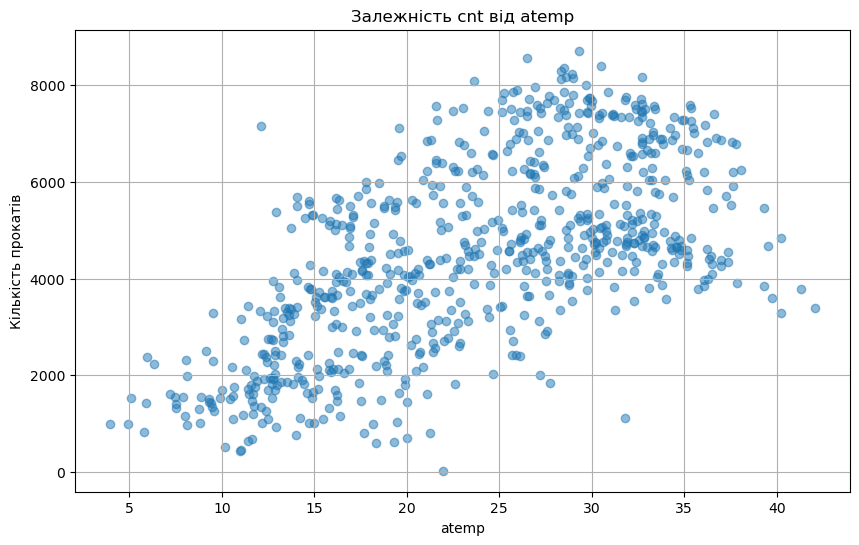

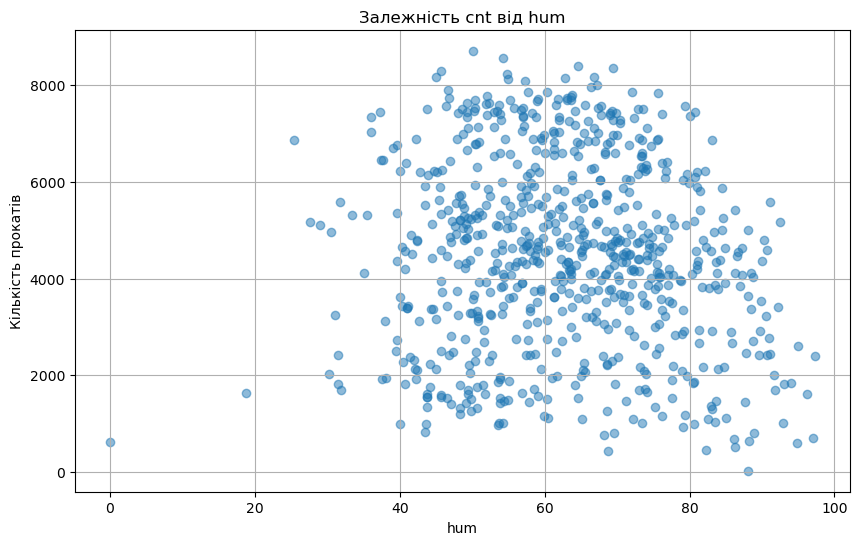

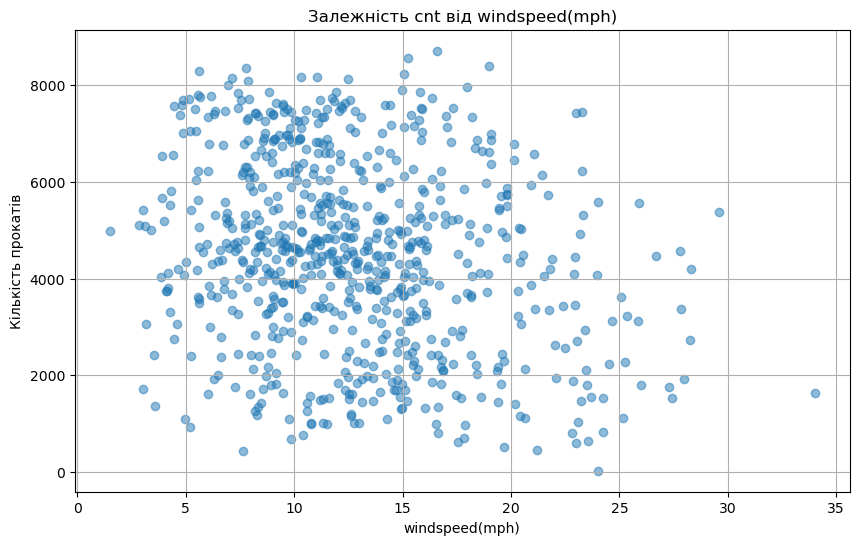

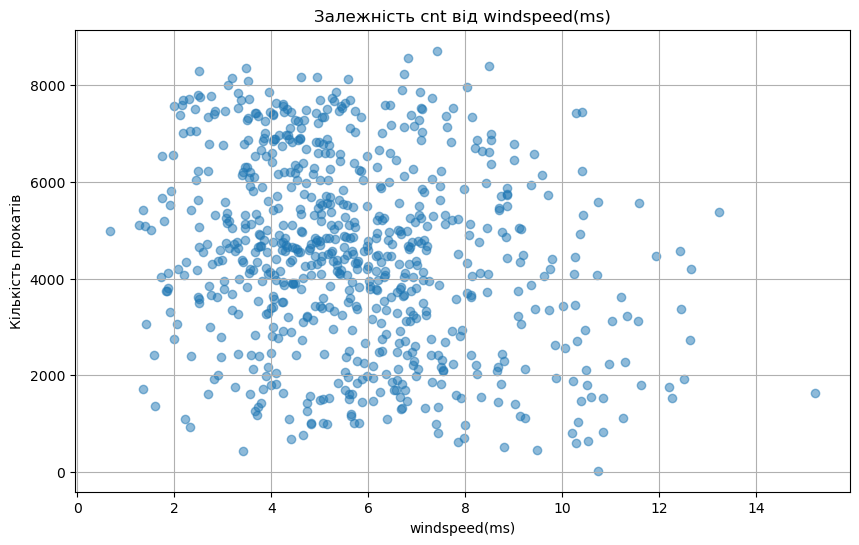

In [5]:

features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 
            'workingday', 'weathersit', 'temp', 'atemp', 'hum', 
            'windspeed(mph)', 'windspeed(ms)']

# Побудова графіків
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df['cnt'], alpha=0.5)
    plt.title(f'Залежність cnt від {feature}')
    plt.xlabel(feature)
    plt.ylabel('Кількість прокатів')
    plt.grid(True)
    plt.show()


In [ ]:
'''
Характер залежності кількості прокатів від місяця:
На графіку залежності кількості прокатів від місяця ми бачимо, що залежність не є лінійною. Є виразний сезонний тренд: кількість прокатів збільшується влітку і зменшується взимку. Тобто, це типова нелинійна залежність, де кількість прокатів має явно виражений сезонний характер.
Ознаки, від яких кількість прокатів скоріше за все залежить лінійно:
На основі побудованих графіків можна припустити, що кількість прокатів лінійно залежить від температури (temp або atemp). Іншою можливою лінійною залежністю є відчуття температури (atemp), оскільки ця ознака дуже схожа на реальну температуру, але може враховувати і відчуття людини в різні погодні умови.
Також, можна припустити, що кількість прокатів може лінійно залежати від швидкості вітру в метрах за секунду (windspeed(ms)), але це не так очевидно і потребує додаткового аналізу.
'''

In [6]:

correlations = df.iloc[:, :-1].corrwith(df['cnt'])


print(correlations)


season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64


In [7]:
numerical_features = df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']]
correlation_matrix = numerical_features.corr()
print(correlation_matrix)

                    temp     atemp       hum  windspeed(mph)  windspeed(ms)  \
temp            1.000000  0.991702  0.126963       -0.157944      -0.157944   
atemp           0.991702  1.000000  0.139988       -0.183643      -0.183643   
hum             0.126963  0.139988  1.000000       -0.248489      -0.248489   
windspeed(mph) -0.157944 -0.183643 -0.248489        1.000000       1.000000   
windspeed(ms)  -0.157944 -0.183643 -0.248489        1.000000       1.000000   
cnt             0.627494  0.631066 -0.100659       -0.234545      -0.234545   

                     cnt  
temp            0.627494  
atemp           0.631066  
hum            -0.100659  
windspeed(mph) -0.234545  
windspeed(ms)  -0.234545  
cnt             1.000000  


In [8]:
features = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']
correlation_matrix = df[features].corr()
print(correlation_matrix)
print(df[features].mean())
binary_features = ['holiday', 'workingday']
for feature in binary_features:
    print(f"Fraction of ones in {feature}: {df[feature].mean()}")


                    temp     atemp       hum  windspeed(mph)  windspeed(ms)  \
temp            1.000000  0.991702  0.126963       -0.157944      -0.157944   
atemp           0.991702  1.000000  0.139988       -0.183643      -0.183643   
hum             0.126963  0.139988  1.000000       -0.248489      -0.248489   
windspeed(mph) -0.157944 -0.183643 -0.248489        1.000000       1.000000   
windspeed(ms)  -0.157944 -0.183643 -0.248489        1.000000       1.000000   
cnt             0.627494  0.631066 -0.100659       -0.234545      -0.234545   

                     cnt  
temp            0.627494  
atemp           0.631066  
hum            -0.100659  
windspeed(mph) -0.234545  
windspeed(ms)  -0.234545  
cnt             1.000000  
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64
Fraction of ones in holiday: 0.028727770177838577
Fraction of 

In [9]:
normalized_features = (df[features] - df[features].mean()) / df[features].std()


print(normalized_features.mean())


temp             -1.069216e-16
atemp            -2.430037e-16
hum               3.110447e-16
windspeed(mph)   -9.720147e-17
windspeed(ms)     3.304850e-16
cnt              -7.776117e-17
dtype: float64


In [10]:
from sklearn.linear_model import LinearRegression

# Створення регресора
regressor = LinearRegression()

# Навчання регресора на всіх даних
regressor.fit(normalized_features, df['cnt'])

# Виведення ваг моделі
weights = list(zip(df.columns[:-1], regressor.coef_))
for feature, weight in weights:
    print(f"{feature}: {weight}")

from sklearn.linear_model import Ridge

# Створення регресора з регуляризацією
ridge_regressor = Ridge(alpha=0.5)  # alpha - коефіцієнт регуляризації

# Навчання регресора на всіх даних
ridge_regressor.fit(normalized_features, df['cnt'])

# Виведення ваг моделі для Ridge регресора
ridge_weights = list(zip(df.columns[:-1], ridge_regressor.coef_))
for feature, weight in ridge_weights:
    print(f"{feature}: {weight}")


season: -4.0349022056380596e-12
yr: 2.6808886521429935e-12
mnth: -7.741094495693191e-14
holiday: 0.0007933928770094469
weekday: -0.00079339287697752
workingday: 1937.2114516187671
season: 0.5156352235850084
yr: 1.04476253190783
mnth: -0.571337722284968
holiday: -0.22399216326614577
weekday: -0.223992163528681
workingday: 1934.7408323366992


In [11]:
from sklearn.linear_model import Lasso

# Створення Lasso регресора
lasso_regressor = Lasso(alpha=0.5)  # alpha - коефіцієнт регуляризації

# Навчання регресора на всіх даних
lasso_regressor.fit(normalized_features, df['cnt'])

# Виведення ваг моделі для Lasso регресора
lasso_weights = list(zip(df.columns[:-1], lasso_regressor.coef_))
for feature, weight in lasso_weights:
    print(f"{feature}: {weight}")


season: 0.0
yr: 0.0
mnth: -0.0
holiday: -0.0
weekday: -0.0
workingday: 1936.7107666872607


In [12]:
from sklearn.linear_model import Ridge

# Створення Ridge регресора
ridge_regressor = Ridge(alpha=0.5)  # alpha - коефіцієнт регуляризації

# Навчання регресора на всіх даних
ridge_regressor.fit(normalized_features, df['cnt'])

# Виведення ваг моделі для Ridge регресора
ridge_weights = list(zip(df.columns[:-1], ridge_regressor.coef_))
for feature, weight in ridge_weights:
    print(f"{feature}: {weight}")


season: 0.5156352235850084
yr: 1.04476253190783
mnth: -0.571337722284968
holiday: -0.22399216326614577
weekday: -0.223992163528681
workingday: 1934.7408323366992


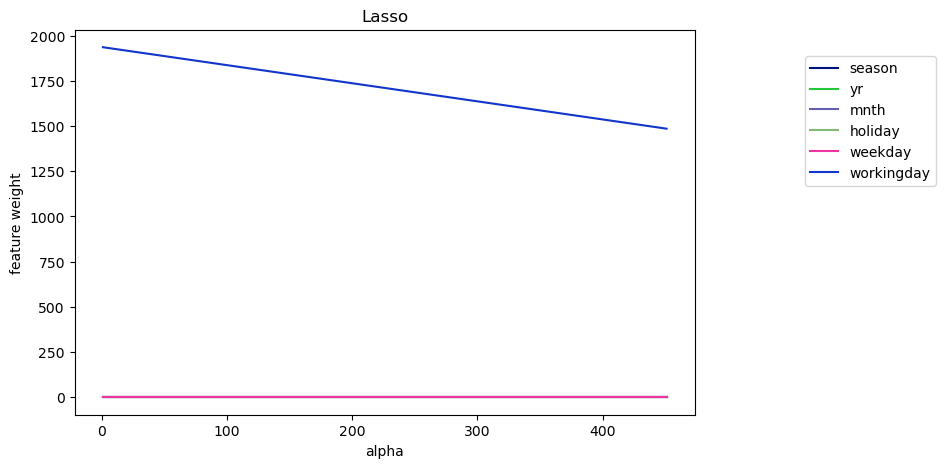

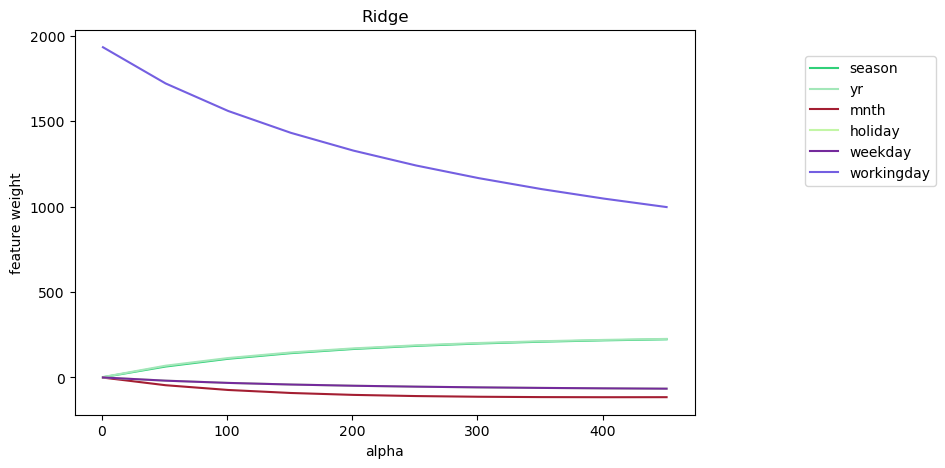

In [14]:
import numpy as np
alphas = np.arange(1, 500, 50)

# Списки для зберігання ваг Lasso та Ridge
coefs_lasso = []
coefs_ridge = []

for alpha in alphas:
    # Lasso регресор
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(normalized_features, df['cnt'])
    coefs_lasso.append(lasso_regressor.coef_)
    
    # Ridge регресор
    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(normalized_features, df['cnt'])
    coefs_ridge.append(ridge_regressor.coef_)

# Конвертація списків в np.array
coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)

# Візуалізація
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns[:-1]):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns[:-1]):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()